## Seção 5.1.2: Ilustração dos Efeitos de Atraso de Grupo e Atenuação


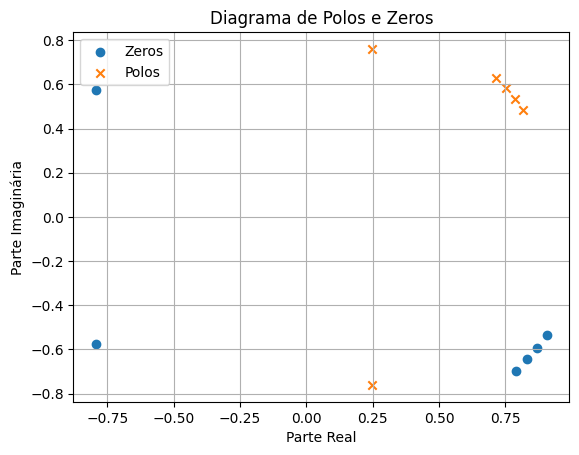

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, zpk2tf

# Definição dos polos e zeros
zeros = [0.98 * np.exp(1j * 0.8 * np.pi), 0.98 * np.exp(-1j * 0.8 * np.pi)]
poles = [0.8 * np.exp(1j * 0.4 * np.pi), 0.8 * np.exp(-1j * 0.4 * np.pi)]

# H1(z)
b1, a1 = zpk2tf(zeros, poles, 1)

# H2(z)
ck = [0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * k)) for k in range(1, 5)]
zeros2 = [1 / c for c in ck]
poles2 = ck
b2, a2 = zpk2tf(zeros2, poles2, 1)

# H(z) = H1(z) * H2(z)
b = np.polymul(b1, b2)
a = np.polymul(a1, a2)

# Plot do diagrama de polos e zeros
plt.figure()
plt.scatter(np.real(zeros + zeros2), np.imag(zeros + zeros2), marker='o', label='Zeros')
plt.scatter(np.real(poles + poles2), np.imag(poles + poles2), marker='x', label='Polos')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Diagrama de Polos e Zeros')
plt.legend()
plt.grid()
plt.show()

## Seção 7.6.1: Filtro Passa-Baixa


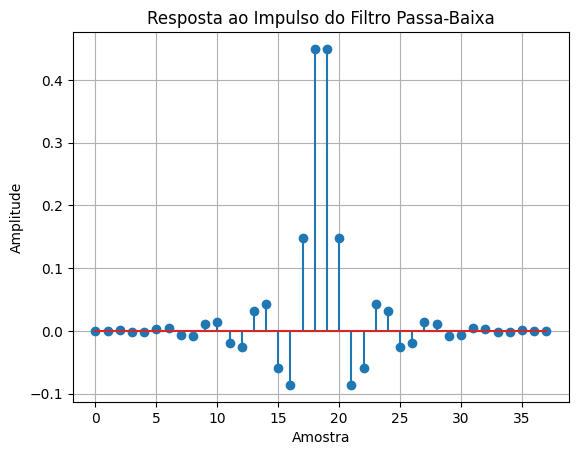

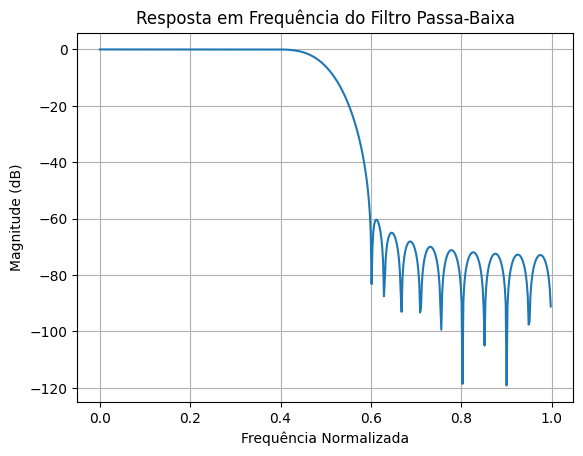

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz

# Especificações do filtro
wp = 0.4 * np.pi
ws = 0.6 * np.pi
delta = 0.001
wc = (wp + ws) / 2 / np.pi

# Parâmetros da janela de Kaiser
A = -20 * np.log10(delta)
beta = 5.653
M = 37

# Resposta ao impulso do filtro
h = firwin(M + 1, wc, window=('kaiser', beta))

# Plot da resposta ao impulso
plt.figure()
plt.stem(h)
plt.title('Resposta ao Impulso do Filtro Passa-Baixa')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Resposta em frequência
w, H = freqz(h)
plt.figure()
plt.plot(w / np.pi, 20 * np.log10(np.abs(H)))
plt.title('Resposta em Frequência do Filtro Passa-Baixa')
plt.xlabel('Frequência Normalizada')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()

## Seção 7.6.2: Filtro Passa-Alta


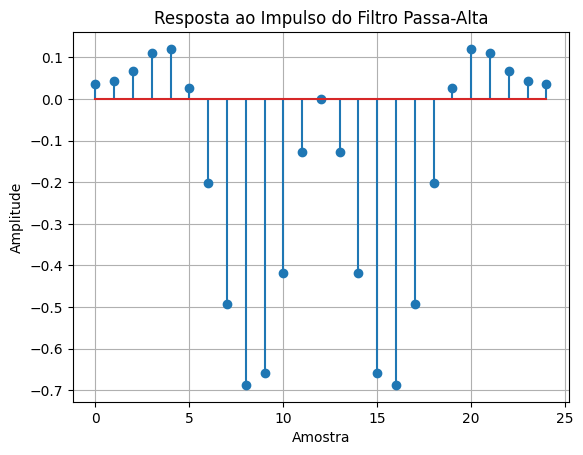

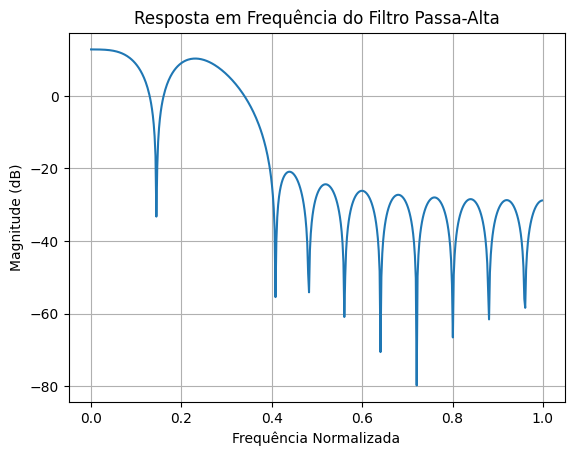

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz

# Especificações do filtro
ws = 0.35 * np.pi
wp = 0.5 * np.pi
delta = 0.02
wc = (ws + wp) / 2 / np.pi

# Parâmetros da janela de Kaiser
A = 33.98
beta = 2.65
M = 24

# Resposta ao impulso do filtro passa-alta
n = np.arange(0, M + 1)
h_hp = np.sinc((n - M / 2) / np.pi) - np.sinc(wc * (n - M / 2) / np.pi)
h_hp *= np.kaiser(M + 1, beta)

# Plot da resposta ao impulso
plt.figure()
plt.stem(h_hp)
plt.title('Resposta ao Impulso do Filtro Passa-Alta')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Resposta em frequência
w, H = freqz(h_hp)
plt.figure()
plt.plot(w / np.pi, 20 * np.log10(np.abs(H)))
plt.title('Resposta em Frequência do Filtro Passa-Alta')
plt.xlabel('Frequência Normalizada')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()